In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [520]:
# get titanic data as a pandas DataFrame
tdf = pd.read_csv("titanic_data.csv")

# preview the data
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [521]:
#     VARIABLE DESCRIPTIONS:
#     survival        Survival
#                     (0 = No; 1 = Yes)
#     pclass          Passenger Class
#                     (1 = 1st; 2 = 2nd; 3 = 3rd)
#     name            Name
#     sex             Sex
#     age             Age
#     sibsp           Number of Siblings/Spouses Aboard
#     parch           Number of Parents/Children Aboard
#     ticket          Ticket Number
#     fare            Passenger Fare
#     cabin           Cabin
#     embarked        Port of Embarkation
#                     (C = Cherbourg; Q = Queenstown; S = Southampton)


In [522]:
# Questions:

# 1. Survival with age, family or wealth relation
# 2. 
# 3. 
# 

In [523]:
# remove not relevant to question columns
tdf = tdf.drop(['PassengerId','Name','Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)

In [524]:
# Check data information

tdf.info()

# Unfortunatly there is values missing from Age column
# Filling NaN with mean values could do a quick repair

tdf = tdf.fillna(tdf['Age'].mean())

# Creating age Series
age = tdf['Age']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


-0.549499619944 correlation


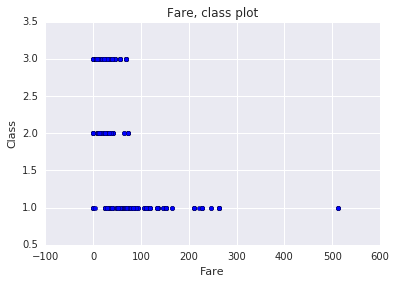

In [525]:
# Fare and Pclass columns could be aggregated into wealth

fare, pclass = pd.Series(tdf['Fare']), pd.Series(tdf['Pclass'])
print (pclass.corr(fare, 'pearson'), 'correlation')

plt.title("Fare, class plot")
plt.xlabel("Fare")
plt.ylabel("Class")
plt.scatter(fare, pclass)

# Some of first class passangers paid lower than average price for tickets, which is interesting,
# yet moderate correlation is still present between these values
# therefore assuming rich people mostly have higher class along with ticket prices

# discarding Pclass as harder to interpret

tdf = tdf.drop(['Pclass'], axis=1)

# Wealth

wealth = fare

In [526]:
# Number of Siblings/Spouses Aboard
# and Number of Parents/Children Aboard
# contribute to a family factor

sibsp, parch = pd.Series(tdf['SibSp']), pd.Series(tdf['Parch'])
print (SibSp.corr(Parch, 'pearson'), 'correlation', '\n')

# Weak to moderate correlation between two Series is present
# Assume that sibsp is less important than parch in family relationship and then merge into one
# 

def nonzero(number):
    if number == 0:
        return 0 
    return 1

family = family.apply(nonzero)

0.41483769862 correlation 



In [527]:
# Standartize family and wealth

wealth = (wealth - wealth.mean()) / wealth.std()

tdf['Family'] = family
tdf['Wealth'] = wealth



In [528]:
tdf = tdf.drop(['Parch','SibSp', 'Fare'], axis=1)
tdf.head()

,Survived,Age,Family,Wealth
0,0,22.0,1,-0.502163
1,1,38.0,1,0.786404
2,1,26.0,0,-0.488580
3,1,35.0,1,0.420494
4,0,35.0,0,-0.486064


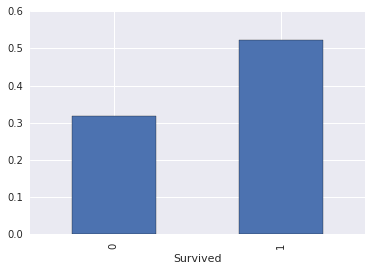

In [529]:
tdf.groupby('Survived').mean()['Family'].plot(kind='bar')
tdf.groupby('Survived')['Family']


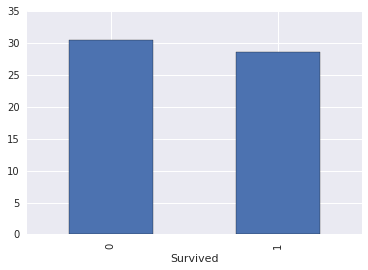

In [530]:
tdf.groupby('Survived').mean()['Age'].plot(kind='bar')

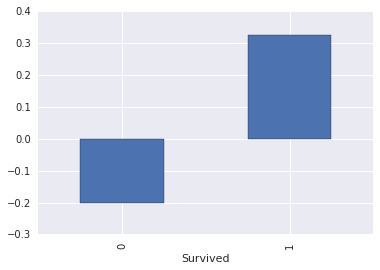

In [531]:
tdf.groupby('Survived').mean()['Wealth'].plot(kind='bar')